In [1]:
import numpy as np
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
frame = pd.read_csv('data.csv', header=0, sep=';')

In [2]:
frame


,rid,eventdatetime,event_point,event_name
0,50997480,01.02.2017 0:05,AMB-3,entrance
1,50997490,01.02.2017 0:05,AMB-3,entrance
2,50997512,01.02.2017 0:06,NB-5,exit
3,50997627,01.02.2017 0:12,AMB-3,exit
4,50997661,01.02.2017 0:14,AMB-2,entrance
5,50997665,01.02.2017 0:14,MB-3,entrance
6,50997669,01.02.2017 0:14,MB-1,entrance
7,50997687,01.02.2017 0:15,NB-2,exit
8,50997729,01.02.2017 0:17,NB-5,exit
9,50997731,01.02.2017 0:17,NB-4,exit


In [ ]:

# for x in frame['eventdatetime']:
#     lst = str(x).split('.')
#     lst[1], lst[0] = lst[0], lst[1]
#     frame = frame.replace(x,'.'.join(lst))


In [26]:
# from datetime import datetime, timezone
# x = datetime.strptime(str(frame['eventdatetime'][1]), '%d.%m.%Y %H:%M')

# for x in frame['eventdatetime']:
#     frame = frame.replace(x, datetime.strptime(str(x), '%d.%m.%Y %H:%M'))
#frame.loc[x] = datetime.strptime(str(x), '%d.%m.%Y %H:%M')
frame['eventdatetime'] =  pd.to_datetime(frame['eventdatetime'], format = '%d.%m.%Y %H:%M')
frame['value'] = 1
print(frame)

              rid       eventdatetime event_point event_name  value
0        50997480 2017-02-01 00:05:00       AMB-3   entrance      1
1        50997490 2017-02-01 00:05:00       AMB-3   entrance      1
2        50997512 2017-02-01 00:06:00        NB-5       exit      1
3        50997627 2017-02-01 00:12:00       AMB-3       exit      1
4        50997661 2017-02-01 00:14:00       AMB-2   entrance      1
5        50997665 2017-02-01 00:14:00        MB-3   entrance      1
6        50997669 2017-02-01 00:14:00        MB-1   entrance      1
7        50997687 2017-02-01 00:15:00        NB-2       exit      1
8        50997729 2017-02-01 00:17:00        NB-5       exit      1
9        50997731 2017-02-01 00:17:00        NB-4       exit      1
10       50997738 2017-02-01 00:17:00        NB-4   entrance      1
11       50997760 2017-02-01 00:19:00       AMB-3       exit      1
12       50997776 2017-02-01 00:19:00        NB-5       exit      1
13       50997787 2017-02-01 00:20:00        NB-

In [27]:
from pandas import Timestamp
n_0 = 1483315500+2592000
n_end = 1498825500



In [28]:
def get_dates(x):
    # Select the df values between start and ending datetime. 
    k = frame[(frame['eventdatetime']>=x['start'])&(frame['eventdatetime']<x['end'])]
    # Return first id and sum of values
    
    try: 
#         if(pd.Timestamp(k['eventdatetime'].values[0], unit = 's') > pd.Timestamp(1483315500 + 300*285, unit = 's')):
#             print(k['rid'].values)
        return k['rid'].values[0], k['eventdatetime'].values[0], k['value'].sum()
    except IndexError:
        return 0, 0, 0
    else:
        return -1, -1, -1
        

Data = pd.DataFrame(columns = ['rid', 'time', 'value'])
n = n_0

while(n < n_end):
    start_date = pd.Timestamp(n, unit='s') 
    end_date = pd.Timestamp(n + 300, unit='s') 
    ndf = pd.DataFrame({'start':start_date,'end':end_date}, index=[0])
    n = n + 300

    ndf[['rid','time', 'value']] = ndf.apply(lambda x : get_dates(x),1).apply(pd.Series)
    rid = ndf['rid'].values[0]
    value = ndf['value'].values[0]
    time = ndf['time'].values[0]
    new_line = {'rid':rid, 'time':time, 'value':value}
    Data = Data.append(new_line, ignore_index = True)


KeyboardInterrupt: 

In [38]:
#int(pd.Timestamp(n_0, unit='s').asm8)*10e-9

14859075000.0

In [21]:
Data

,rid,time,value
0,50997480,2017-02-01 00:05:00,3
1,50997627,2017-02-01 00:12:00,4
2,50997687,2017-02-01 00:15:00,6
3,50997787,2017-02-01 00:20:00,4
4,50997876,2017-02-01 00:25:00,2
5,50998052,2017-02-01 00:34:00,2
6,50998101,2017-02-01 00:37:00,1
7,50998142,2017-02-01 00:40:00,4
8,0,0,0
9,0,0,0


In [3]:
Data.to_csv('5_min_20_days.csv', sep=';', header=True, index=False)


In [ ]:
Data = pd.read_csv('5_min_20_days.csv', header=0, sep=';')

In [18]:
n = 5000
x = Data[['value']][:n]
print(np.arange(0, 500, 1),x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [1]:
# %pylab
# plt.figure(figsize(8,6))
# plt.hist(abs(y_test - lm.predict(X_test)) - abs(y_test - rf.predict(X_test)), bins=15, normed=True)
# stat.plot(kind='bar', fontsize=14, width=0.0025, color="red")
# plt.xticks(rotation=0)
# plt.ylabel('value', fontsize=14)
# plt.xlabel('time', fontsize=14)



# # the histogram of the data
# plt.hist(x['value'], bins =  np.arange(0, 500, 1),  facecolor='red')


# plt.xlabel('time')
# plt.ylabel('Values')
# plt.title('Values')
# #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 500)
# plt.ylim(0, 50)
# plt.grid(True)
# plt.show()

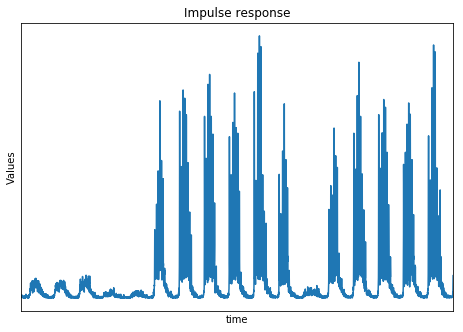

In [30]:
a = plt.axes([0.2, 0.6, 1, 1],)
plt.plot(np.arange(0, n, 1), x)
plt.title('Impulse response')
plt.xlim(0, 5000)
plt.xticks([])
plt.yticks([])
plt.xlabel('time')
plt.ylabel('Values')
plt.grid(True)

plt.show()
